In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [9]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [5]:
df = pd.read_csv('abt_titanic.csv')
print(df.shape)

(891, 12)


In [6]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,missing_age,related,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing
0,0,1,0,3,0,22.0,0,1,0,0,1,0
1,1,2,1,1,1,38.0,0,1,1,0,0,0
2,2,3,1,3,1,26.0,0,0,0,0,1,0
3,3,4,1,1,1,35.0,0,1,0,0,1,0
4,4,5,0,3,0,35.0,0,0,0,0,1,0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y = df.Survived

X = df.drop('Survived', axis = 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [11]:
print( len (X_train), len(X_test), len(y_train), len(y_test))

712 179 712 179


In [12]:
X_train.describe()

,Unnamed: 0,PassengerId,Pclass,Sex,Age,missing_age,related,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.803371,449.803371,2.300562,0.359551,29.575724,0.198034,0.907303,0.182584,0.082865,0.733146,0.001404
std,257.670530,257.670530,0.845007,0.480206,13.322938,0.398798,1.623440,0.386597,0.275872,0.442626,0.037477
min,0.000000,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.750000,225.750000,1.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,454.500000,455.500000,3.000000,0.000000,29.699118,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,673.250000,674.250000,3.000000,1.000000,35.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,890.000000,891.000000,3.000000,1.000000,80.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
make_pipeline(StandardScaler(),RandomForestClassifier(random_state = 123) )

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min...s='warn', n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False))])

In [15]:
# Create pipelines dictionary
pipelines = {
    'RF' : make_pipeline(StandardScaler(),RandomForestClassifier(random_state = 123)),
    'GB' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state = 123))
}

In [16]:
pipelines['RF'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('randomforestclassifier',
   RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
               max_depth=None, max_features='auto', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
               oob_score=False, random_state=123, verbose=0, warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=

In [18]:
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100,200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf': [1, 3, 5,10]
}

In [20]:
pipelines['GB'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('gradientboostingclassifier',
   GradientBoostingClassifier(criterion='friedman_mse', init=None,
                 learning_rate=0.1, loss='deviance', max_depth=3,
                 max_features=None, max_leaf_nodes=None,
                 min_impurity_decrease=0.0, min_impurity_split=None,
                 min_samples_leaf=1, min_samples_split=2,
                 min_weight_fraction_leaf=0.0, n_estimators=100,
                 n_iter_no_change=None, presort='auto', random_state=123,
                 subsample=1.0, tol=0.0001, validation_fraction=0.1,
                 verbose=0, warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'gradientboostingclassifier': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes

In [22]:
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100,200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2 ],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

In [23]:
hyperparameters = {
    'RF' : rf_hyperparameters,
    'GB' :gb_hyperparameters
}

In [24]:
from sklearn.model_selection import GridSearchCV

In [26]:
print(X_train.shape)
print(y_train.shape)

(712, 11)
(712,)


In [27]:
#create empty dictionnary called fitted_ model
fitted_models = {}

#Loop through model pipeline, tuning each one and saving it to fitted_model

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs=-1)
    
    #fit model on X_train y_train
    model.fit(X_train, y_train)
    
    #store model in fitted_models[name]
    fitted_models[name] = model
    
    #print{name} has)been fitted
    print(name, 'has been fitted')

/home/fatima_moqran/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/fatima_moqran/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


RF has been fitted
GB has been fitted


/home/fatima_moqran/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/fatima_moqran/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [30]:
#Auroc Review
#fitted_models

for name, model in fitted_models.items():
    print(name,model.best_score_)

RF 0.8160112359550562
GB 0.8174157303370787


In [31]:
pred = fitted_models['RF'].predict(X_test)
print(pred[0:10])


[1 0 0 1 1 0 0 1 0 0]


/home/fatima_moqran/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [33]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, pred)
print(cm)

[[103   6]
 [ 22  48]]


In [36]:
#predicted positive class
pred_pos_class = fitted_models['RF'].predict_proba(X_test)
pred_pos_class = [p[1] for p in pred_pos_class] #prediction de le classe positive
print(np.round(pred_pos_class[:10],2))

[0.96 0.12 0.14 0.92 0.62 0.49 0.33 0.53 0.1  0.2 ]


/home/fatima_moqran/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
#calculate ROC curve from y and pred
fpr, tpr, thresholds = roc_curve(y_test, pred_pos_class)

In [41]:
# dataframe with results
pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Thresholds': thresholds})

,FPR,TPR,Thresholds
0,0.000000,0.000000,1.958840
1,0.000000,0.014286,0.958840
2,0.000000,0.085714,0.946863
3,0.009174,0.085714,0.942320
4,0.009174,0.271429,0.869150
5,0.018349,0.271429,0.856838
6,0.018349,0.557143,0.628067
7,0.036697,0.557143,0.614686
8,0.036697,0.628571,0.532409
9,0.045872,0.628571,0.525781


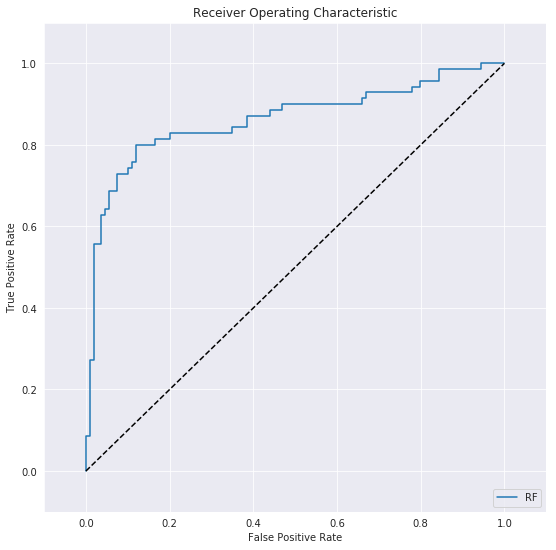

In [42]:
#Initialize figure
fig = plt.figure(figsize = (9,9))
plt.title('Receiver Operating Characteristic')

#Plot ROC curve
plt.plot(fpr,tpr, label='RF')
plt.legend(loc = 'lower right')



#Diagonal 45 degree line
plt.plot([0,1], [0,1], 'k--')

#Axes limits and labels
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
#calculate the Auroc
roc_auc_score(y_test, pred_pos_class)

0.8627785058977719

In [50]:
#pick the winner 
for name, model in fitted_models.items():
    pred_pos_class = fitted_models[name].predict_proba(X_test)
    pred_pos_class = [p[1] for p in pred_pos_class]
    print(f'{name} {roc_auc_score(y_test, pred_pos_class)}')

RF 0.8627785058977719
GB 0.8674311926605505


/home/fatima_moqran/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/fatima_moqran/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [53]:
#validation curves
from sklearn.model_selection import validation_curve
classifier = RandomForestClassifier(random_state=123)
parameter_grid = np.linspace(25, 200, 8).astype(int)

train_scores, validation_score = validation_curve(classifier, X,y,'n_estimators', parameter_grid, cv = 5)
print('validation curves')
print(f'\nParam : n_estimators\nTraining scores: \n {train_scores}')
print(f'\nParam : n_estimators\nValidation score:\n {validation_score}')      

validation curves

Param : n_estimators
Training scores: 
 [[1.         1.         0.99579243 0.99859748 0.99719888]
 [0.99859551 0.99859551 1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]]

Param : n_estimators
Validation score:
 [[0.63128492 0.80446927 0.80898876 0.83707865 0.81920904]
 [0.63687151 0.81005587 0.80898876 0.8258427  0.81920904]
 [0.63128492 0.81005587 0.80898876 0.83146067 0.81920904]
 [0.63128492 0.80446927 0.81460674 0.84269663 0.81355932]
 [0.6424581  0.80446927 0.80898876 0.83707865 0.83050847]
 [0.64804469 0.80446927 0.81460674 0.83707865 0.84180791]
 [0.64804469 0.79329609 0.80898876 0.83707865 0.84180791]
 [0.6424581  0.79329609 0.808

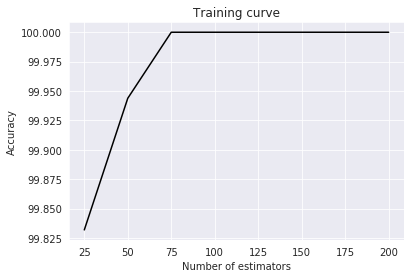

In [55]:
#plot the curve
plt.figure()
plt.plot(parameter_grid,100*np.average(train_scores, axis = 1), color = 'black')
plt.title('Training curve')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

In [64]:
#save the best estimator
import pickle
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['GB'].best_estimator_, f )

In [65]:
loaded_model = pickle.load(open('final_model.pkl', 'rb'))

In [66]:
loaded_model

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
  ...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))])

In [68]:
df.shape

(891, 12)